<a href="https://colab.research.google.com/github/leegyuhi/oooooooooooooh/blob/master/LorenzEaquationSolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scipy를 이용한 Lorenz Equation의 풀이

### Lorenz equation

로렌즈 방정식은 $x(t),y(t),z(t)$ 세 변수에 대한 1차 비선형 연립 상미분 방정식이며, 세 개의 매개변수 $\sigma, \beta, \rho $ 에 의존한다.

$${\displaystyle {\dot {x}}=\sigma (y-x)}\\
{\displaystyle {\dot {y}}=x(\rho -z)-y}\\
{\displaystyle {\dot {z}}=xy-\beta z}$$

매개변수 값들은 다음과 같다.

$$\sigma=10, \: \beta=\frac{8}{3}, \: \rho=28 $$

### scipy.integrate.solve_ivp
- scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, **options)
  - fun : fun(t,y)
  - t_span : (t0, tf), t=t0부터 t=tf까지 적분
  - y0 : 초기값

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.integrate import solve_ivp
import sympy

In [0]:
def lorenz(t, xyz):
    x, y, z = xyz
    return [sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z]

In [0]:
xyz0 = [0., 1., 1.05]
t = (0,25)

In [5]:
rho, sigma, beta = 28, 8, 8/3.0

xyz1 = solve_ivp(lorenz, t, xyz0, t_eval=np.linspace(0,25,10000))
print(xyz1)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 2360
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.50025003e-03, 5.00050005e-03, ...,
       2.49949995e+01, 2.49974997e+01, 2.50000000e+01])
 t_events: None
        y: array([[ 0.00000000e+00,  1.97829257e-02,  3.91512920e-02, ...,
        -4.28512160e+00, -4.18081927e+00, -4.07881009e+00],
       [ 1.00000000e+00,  9.98171343e-01,  9.97664808e-01, ...,
         9.87117865e-01,  9.76460984e-01,  9.64065967e-01],
       [ 1.05000000e+00,  1.04304732e+00,  1.03618946e+00, ...,
         2.73216707e+01,  2.71297763e+01,  2.69395174e+01]])


In [6]:
rho, sigma, beta = rho, sigma, 0.6*beta

xyz2 = solve_ivp(lorenz, t, xyz0, t_eval=np.linspace(0,25,10000))
print(xyz2)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 2114
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.50025003e-03, 5.00050005e-03, ...,
       2.49949995e+01, 2.49974997e+01, 2.50000000e+01])
 t_events: None
        y: array([[ 0.00000000e+00,  1.97829255e-02,  3.91512884e-02, ...,
         4.48852813e+00,  4.36299439e+00,  4.23912704e+00],
       [ 1.00000000e+00,  9.98171297e-01,  9.97664443e-01, ...,
        -1.82871177e+00, -1.87164014e+00, -1.91151937e+00],
       [ 1.05000000e+00,  1.04583272e+00,  1.04173077e+00, ...,
         3.23722561e+01,  3.22225794e+01,  3.20736320e+01]])


In [7]:
rho, sigma, beta = rho, 2*sigma, 0.6*beta

xyz3 = solve_ivp(lorenz, t, xyz0, t_eval=np.linspace(0,25,10000))
print(xyz3)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 2378
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.50025003e-03, 5.00050005e-03, ...,
       2.49949995e+01, 2.49974997e+01, 2.50000000e+01])
 t_events: None
        y: array([[ 0.        ,  0.03918279,  0.07683467, ..., 14.24492602,
        14.19840227, 14.14083669],
       [ 1.        ,  0.99883092,  1.00024965, ..., 13.21981954,
        12.89745187, 12.56383476],
       [ 1.05      ,  1.04753199,  1.04516577, ..., 35.95736219,
        36.3350024 , 36.69843184]])


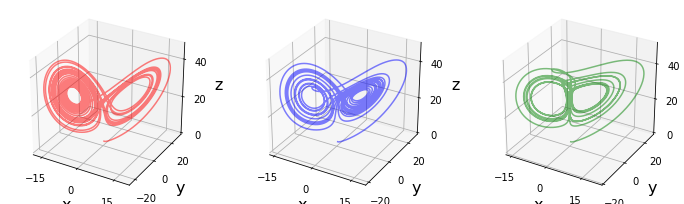

In [8]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5), subplot_kw={'projection': '3d'})

for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz.y[0], xyz.y[1], xyz.y[2], c, alpha=0.5)
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.set_zlabel('z', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])